In [3]:
# importing the standard libraries at the top lavel
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [4]:
import statsmodels.api as sm

In [10]:
from statsmodels.stats. outliers_influence \
            import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [11]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS ,
                        summarize ,
                        poly)

In [13]:
# we load the Boston housing data contained in ISLP 
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [14]:
# Getting more info about the data
Boston?

In [17]:
# The response will be medv and lstat will be the single predictor
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                 'lstat': Boston['lstat']})

In [20]:
X.head(5)

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [23]:
# let's extract and fit the model
y = Boston['medv']

model = sm.OLS(y, X)

# The actual fitting of the model is done using fit()
results = model.fit()

In [24]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


The given text outlines a general approach for specifying models and constructing model matrices using the ISLP library. The ModelSpec() function (renamed MS() in the preamble) creates a transform object. This object is then used with the methods transform() and fit() to build the corresponding model matrix.

The fit() method processes the original array, performing initial computations such as calculating means and standard deviations for centering and scaling, as specified in the transform object. The transform() method then applies this fitted transformation to the data array, producing the model matrix.

In [26]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


These two operations can be combined with the fit_transform() method.

In [31]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [29]:
# Using summary to find out the essentials of the fit
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           5.08e-88
Time:                        00:55:54   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# getting the fitted coefficients from params attribute of results
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [33]:
# for a given value of lstat we use get_prediction method to obtain prediction
new_df = pd.DataFrame ({'lstat':[5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


Computing the predictions at newX

In [34]:
new_predictions = results.get_prediction(newX);
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

Producing the confidence interaval


In [37]:
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [39]:
def abline(ax , b, m, *args , ** kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim ()
    ylim = [m * xlim [0] + b, m * xlim [1] + b]
    ax.plot(xlim , ylim , *args , ** kwargs)

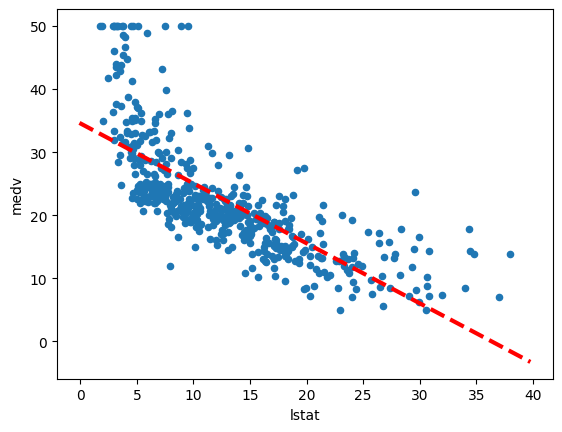

In [41]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax ,
        results.params [0],
        results.params [1],
        'r--',
        linewidth =3)

We are working on some diagnostic pl

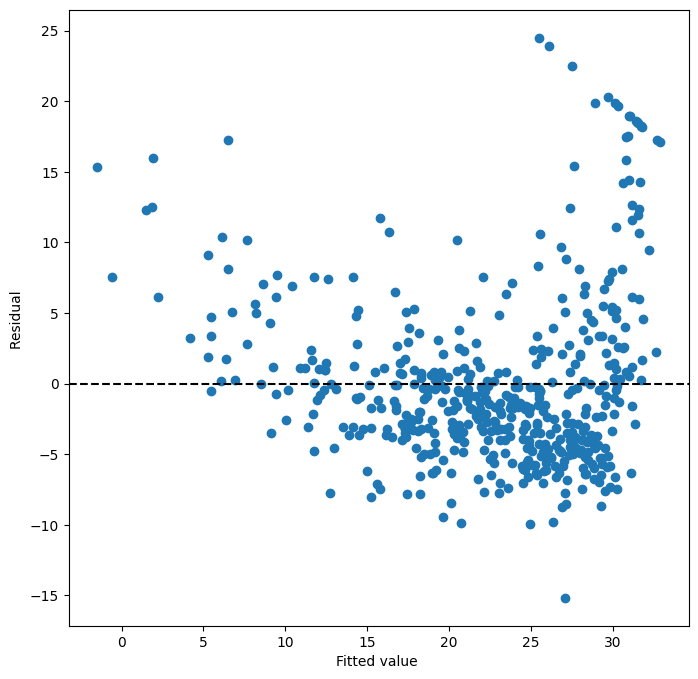

In [42]:
ax = subplots(figsize =(8 ,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value ')
ax.set_ylabel('Residual ')
ax.axhline (0, c='k', ls='--');